<a href="https://colab.research.google.com/github/EllieMwangi/thyroid-prediction/blob/main/Thyroid_Occurrence_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hypothyroidism prediction

### Specify Analysis Question

1. Build a classification model that predicts whether a patient has a hypothyroidism or not. The model will specically be built using ensemble decision trees and support vector machines and performance compared.

### Metrics for Success
1. Identify which measurements are most important in identifying the presence of hypothyroidism.
2. A high accuracy and roc_auc score. At least 90%

### Understanding the Context
The data used in this project was collected during a clinical camp conducted by Nairobi hospital to test for hypothyroidism. The data collected focused on thyroid patients. 

### Recording of Experimental design.

1. Data loading
2. Detection and handling of missing values.
3. Type conversion.
4. Outlier detection.
5. Splitting data
6. Modelling using decision trees
7. Hyperparameter tuning 
8. Feature importance ranking
9. Modelling using svm
10. Hyperparameter tuning
11. Results and conclusion.
12. Challenging the solution

### Data Exploration and Cleaning

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline
sns.set()
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
# Load data
thyroid_data = pd.read_csv('hypothyroid.csv')

# Sample data
thyroid_data.sample(10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
122,hypothyroid,79,F,f,f,f,f,f,f,f,f,f,f,f,y,29,y,1.60,y,47,y,0.97,y,48,n,?
1121,negative,63,F,f,f,f,f,f,t,f,f,f,f,f,y,0.20,y,1.10,y,187,y,0.95,y,197,n,?
2107,negative,65,?,f,f,f,f,f,f,f,f,f,f,f,y,0.03,y,3.20,y,129,y,0.77,y,168,n,?
2513,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0.20,y,2,y,148,y,0.99,y,149,n,?
3035,negative,53,F,t,f,f,t,t,f,f,f,f,f,f,y,0.40,y,2.30,y,123,y,0.95,y,130,n,?
2771,negative,59,M,f,f,f,f,f,f,f,f,f,f,f,n,?,n,?,n,?,n,?,n,?,y,31
1454,negative,36,M,f,f,f,f,f,f,f,f,f,f,f,n,?,n,?,y,97,y,0.85,y,114,n,?
2042,negative,43,M,f,f,f,f,f,f,f,f,f,f,f,y,2.70,y,1.10,y,106,y,0.87,y,122,n,?
2801,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0.30,y,1,y,80,y,0.85,y,94,n,?
243,negative,80,F,f,f,f,f,f,f,f,f,f,f,f,y,1.70,y,0.80,y,101,y,0.81,y,125,n,?


In [3]:
# Column data types
thyroid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [4]:
# Check shape of data
thyroid_data.shape

(3163, 26)

In [5]:
# Get unique values for each column
column_names = thyroid_data.columns.to_list()

for col in column_names:
  print(f'Column: {col} \n')
  print(thyroid_data[col].unique())
  print('************** \n \n')

Column: status 

['hypothyroid' 'negative']
************** 
 

Column: age 

['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
************** 
 

Column: sex 

['M' 'F' '?']
************** 
 

Column: on_thyroxine 

['f' 't']
************** 
 

Column: query_on_thyroxine 

['f' 't']
************** 
 

Column: on_antithyroid_medication 

['f' 't']
************** 
 

Column: thyroid_surgery 

['f' 't']
************** 
 

Column: query_hypothyroid 

['f' 't']
************** 
 

Column: query_hyperthyroid 

['f' 't']
************** 
 

Column: pregnant 

['f' 't']
************** 
 


Certain columns in the data have '?' as a value which symbolises unknown or missing during data collection. Also some numeric columns are in object data type and should be converted to numeric data types.

In [6]:
# Replace '?' with nan
thyroid_data.replace('?', np.nan, inplace=True)

In [7]:
# Check for missing values 
thyroid_data.isnull().sum().sort_values(ascending=False) / thyroid_data.shape[0] * 100

TBG                          91.779956
T3                           21.972811
TSH                          14.796080
age                          14.100537
TT4                           7.872273
T4U                           7.840658
FTI                           7.809042
sex                           2.307936
pregnant                      0.000000
on_thyroxine                  0.000000
query_on_thyroxine            0.000000
on_antithyroid_medication     0.000000
thyroid_surgery               0.000000
query_hypothyroid             0.000000
query_hyperthyroid            0.000000
lithium                       0.000000
sick                          0.000000
tumor                         0.000000
TBG_measured                  0.000000
goitre                        0.000000
TSH_measured                  0.000000
T3_measured                   0.000000
TT4_measured                  0.000000
T4U_measured                  0.000000
FTI_measured                  0.000000
status                   

91% of the TBG column contains null values.

In [8]:
# Drop TBG column
thyroid_data.drop('TBG', axis=1, inplace=True)

In [9]:
# Determine distribution of target variable
thyroid_data['status'].value_counts(normalize=True) * 100

negative       95.226051
hypothyroid     4.773949
Name: status, dtype: float64

In [10]:
# Convert column data types
numeric_columns = ['age', 'TSH','T3', 'TT4','T4U','FTI']
thyroid_data[numeric_columns] = thyroid_data[numeric_columns].astype(np.float64)

In [11]:
# Describe numeric columns
thyroid_data.describe()

,age,TSH,T3,TT4,T4U,FTI
count,2717.000000,2695.000000,2468.000000,2914.000000,2915.000000,2916.000000
mean,51.154214,5.923180,1.939749,108.850000,0.978199,115.397771
std,19.294405,23.899467,0.996773,45.485419,0.226580,60.239572
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,35.000000,0.000000,1.400000,83.000000,0.850000,91.000000
50%,54.000000,0.700000,1.800000,104.000000,0.960000,107.000000
75%,67.000000,2.300000,2.300000,128.000000,1.065000,129.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


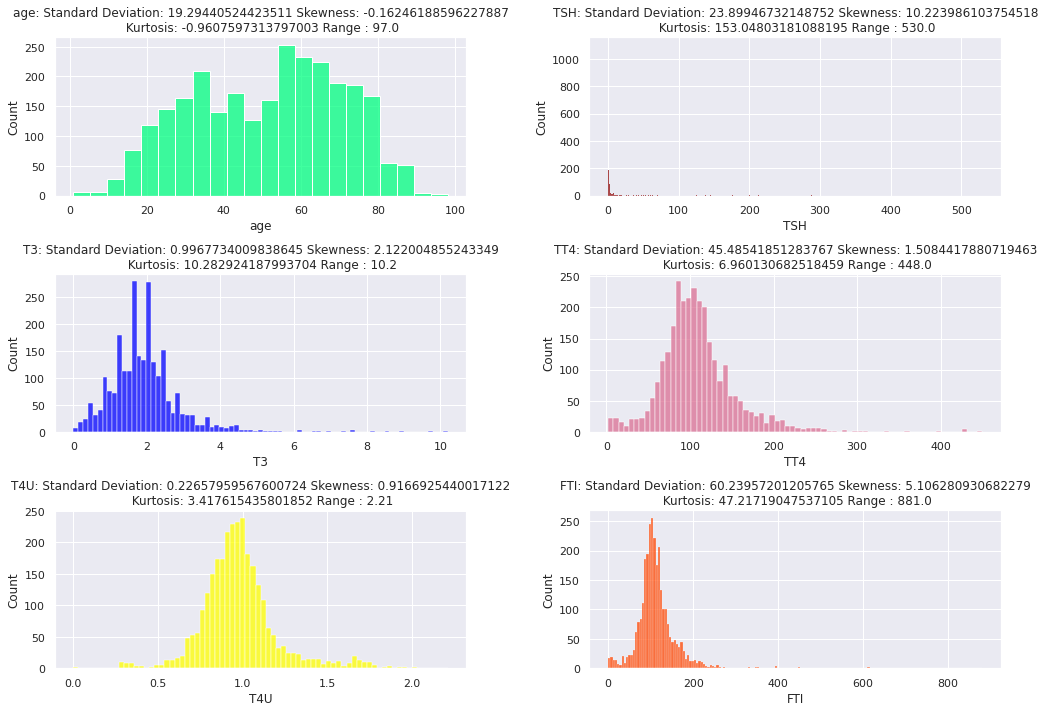

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
colors = ['#00FF7F', '#8B0000', '#0000FF', '#DB7093', '#FFFF00', '#FF4500']

for col, colour, ax in zip(numeric_columns, colors, axes.flatten()):

  standard_var = thyroid_data[col].std()
  skew = thyroid_data[col].skew()
  kurt = thyroid_data[col].kurt()
  range = thyroid_data[col].max() - thyroid_data[col].min()

  sns.histplot(thyroid_data[col],  ax=ax, color=colour)
  ax.set_title(f'{col}: Standard Deviation: {standard_var} Skewness: {skew}\n Kurtosis: {kurt} Range : {range}')

plt.tight_layout()
  

In [13]:
# Fill missing values : for skewed features, median is used as central tendency measure, for unskewed data, the mean is used
fill_values = {'T3':thyroid_data.T3.median(), 'age': thyroid_data.age.mean(), 'FTI': thyroid_data.FTI.median(), 'T4U': thyroid_data.T4U.mean(), 'TSH': thyroid_data.TSH.median(), 'TT4':thyroid_data.TT4.median()}
thyroid_data.fillna(fill_values, inplace=True)

In [14]:
# For sex, fill na with the mode
thyroid_data.fillna({'sex': thyroid_data['sex'].mode()[0]}, inplace=True)

In [15]:
# Map categorical values
false_true = ['on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid','query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre']
yes_no = ['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured','FTI_measured', 'TBG_measured']

false_true_mapper = {'f':0, 't':1}
yes_no_mapper = {'n':0, 'y':1}

for col in false_true:
  thyroid_data[col] = thyroid_data[col].map(false_true_mapper)

for col in yes_no:
  thyroid_data[col] = thyroid_data[col].map(yes_no_mapper)

thyroid_data['sex'] = thyroid_data['sex'].map({'M':0, 'F':1})
thyroid_data['status'] = thyroid_data['status'].map({'hypothyroid': 1, 'negative': 0})

In [16]:
# Transformed data
thyroid_data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,1,72.0,0,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0
1,1,15.0,1,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0
2,1,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0
3,1,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0
4,1,77.0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

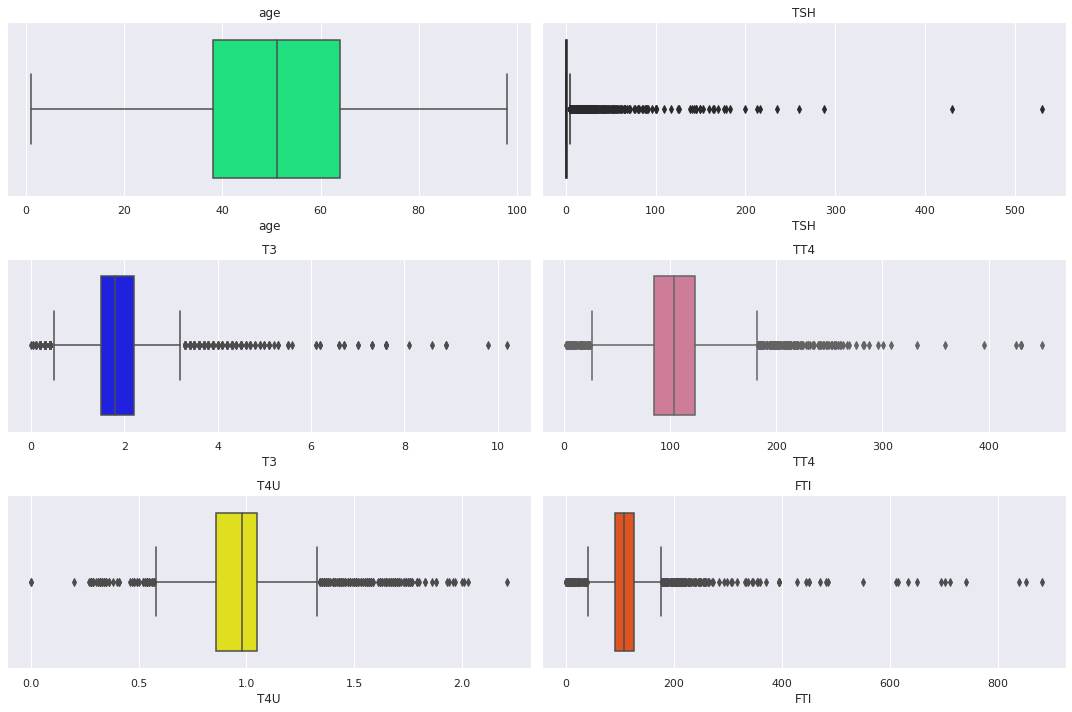

In [17]:
# Determine outlier in data
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
colors = ['#00FF7F', '#8B0000', '#0000FF', '#DB7093', '#FFFF00', '#FF4500']

for col, colour, ax in zip(numeric_columns, colors, axes.flatten()):
  
  sns.boxplot(thyroid_data[col],  ax=ax, color=colour)
  ax.set_title(f'{col}')

plt.tight_layout()
  

Except for the age variable, all other columns have outliers, especially the TSH feature

In [18]:
# Determine outliers using interquantile range
numeric_thyroid = thyroid_data[['TSH', 'T3', 'TT4', 'T4U', 'FTI']]
Q1 = numeric_thyroid.quantile(0.25)
Q3 = numeric_thyroid.quantile(0.75)
IQR = Q3 - Q1

numeric_thyroid[((numeric_thyroid <  Q1 - 1.5 * IQR) | (numeric_thyroid > Q3 + 1.5 * IQR)).any(axis=1)]

,TSH,T3,TT4,T4U,FTI
0,30.00,0.6,15.0,1.48,10.0
1,145.00,1.7,19.0,1.13,17.0
2,0.00,0.2,4.0,1.00,0.0
3,430.00,0.4,6.0,1.04,6.0
4,7.30,1.2,57.0,1.28,44.0
...,...,...,...,...,...
3150,0.70,1.8,188.0,0.73,258.0
3151,0.30,3.1,151.0,1.40,108.0
3154,0.01,1.1,240.0,1.07,223.0
3158,5.80,1.7,86.0,0.91,95.0


891 rows of data contain outliers.

In [19]:
# Determine if outliers are related to the presence or absence of hypothyrodism
outlier_index = numeric_thyroid[((numeric_thyroid <  Q1 - 1.5 * IQR) | (numeric_thyroid > Q3 + 1.5 * IQR)).any(axis=1)].index

thyroid_data.iloc[outlier_index]['status'].value_counts(normalize=True) * 100

0    83.164983
1    16.835017
Name: status, dtype: float64

In [20]:
thyroid_data['status'].value_counts()

0    3012
1     151
Name: status, dtype: int64

In [21]:
thyroid_data.iloc[outlier_index]['status'].value_counts()

0    741
1    150
Name: status, dtype: int64

83% of data points considered outliers have a negative status while 16% have  hypothroid. However almost examples in our data that have a hypothyroid status are considered outliers! This clearly demonstrates a relation, thus retain all outliers.

### Data Modelling

#### Decision Trees

In [22]:
# import Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [23]:
# Split data into train and test sets
X = thyroid_data.drop('status', axis=1)
Y = thyroid_data['status']

# Determine distribution of target variable
thyroid_data['status'].value_counts(normalize=True) * 100

0    95.226051
1     4.773949
Name: status, dtype: float64

In [24]:
# Stratify y
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=23, stratify = Y)

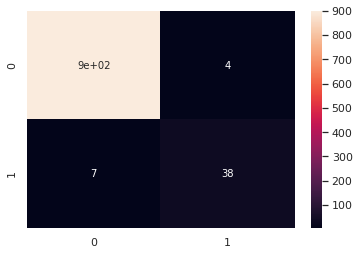

In [25]:
# Intialize and fit random forest model with base parameters
random_classifier = RandomForestClassifier()
random_classifier.fit(x_train, y_train)
# Make predictions
y_pred = random_classifier.predict(x_test)

# Plot confusion matrix
matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index=[0,1], columns=[0,1])
sns.heatmap(matrix, annot=True)

In [26]:
# Get probabilities for positive outcomes
y_prob = random_classifier.predict_proba(x_test)[:, 1]

# Get auc score
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob)}')

ROC AUC Score: 0.9849065880039332


Text(0, 0.5, 'True Positive rate')

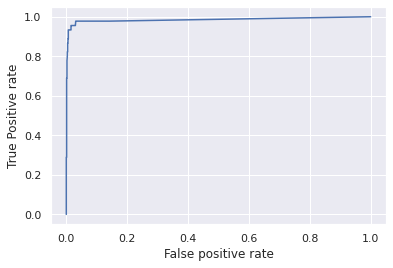

In [27]:
# Plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')

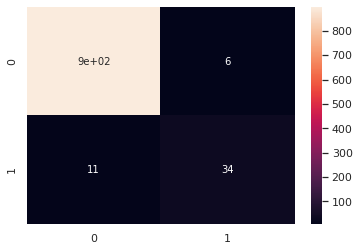

In [28]:
# Intialize and fit adaboost model with a decision tree base model
adaboost_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
adaboost_classifier.fit(x_train, y_train)
# Make predictions
y_pred_ada = adaboost_classifier.predict(x_test)

# Plot confusion matrix
matrix_ada = pd.DataFrame(confusion_matrix(y_test, y_pred_ada), index=[0,1], columns=[0,1])
sns.heatmap(matrix_ada, annot=True)

In [29]:
# Get probabilities for positive outcomes
y_prob_ada = adaboost_classifier.predict_proba(x_test)[:, 1]

# Get auc score
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob_ada)}')

ROC AUC Score: 0.9583579154375614


Text(0, 0.5, 'True Positive rate')

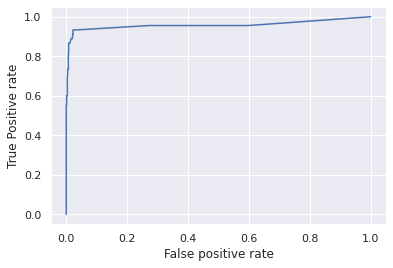

In [30]:
# Plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_ada)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')

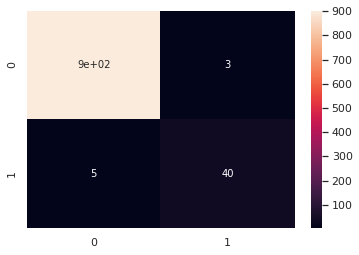

In [31]:
# Intialize and fit gradient boost classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(x_train, y_train)
# Make predictions
y_pred_gb = gb_classifier.predict(x_test)

# Plot confusion matrix
matrix_gb = pd.DataFrame(confusion_matrix(y_test, y_pred_gb), index=[0,1], columns=[0,1])
sns.heatmap(matrix_gb, annot=True)

In [32]:
# Get probabilities for positive outcomes
y_prob_gb = gb_classifier.predict_proba(x_test)[:, 1]

# Get auc score
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob_gb)}')

ROC AUC Score: 0.9768559488692231


Text(0, 0.5, 'True Positive rate')

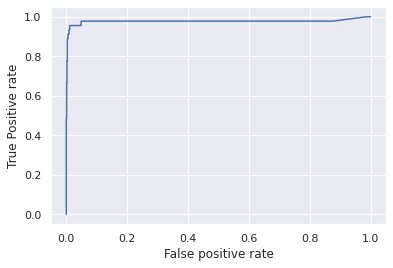

In [33]:
# Plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_gb)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')

Among the 3 models tested, the random forest model has the best performance followed by gradient boosted and adaboost models.

#### Hyperparameter Tuning

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
# Define parameter grid for parameter tuning
param_grid_rand = {
    'max_depth': np.arange(80, 200, 10),
    'min_samples_leaf': [2,3],
    'n_estimators': [100, 200, 300, 500, 800]
}
# Perform cross validation
grid_search_rand = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid_rand, cv = 3, n_jobs = -1, verbose = 0, scoring='roc_auc')

In [36]:
# Get best parameters
grid_search_rand.fit(x_train, y_train)
grid_search_rand.best_params_


{'max_depth': 160, 'min_samples_leaf': 2, 'n_estimators': 300}

In [37]:
# Get best score with tuning
grid_search_rand.best_score_

0.9956168456655786

In [38]:
# Tune adaboost model
param_grid_ada = {
    'learning_rate': np.arange(0.7, 1.0, 0.05),
    'n_estimators': [50, 100, 200],
    'base_estimator__max_depth': np.arange(80, 110, 10),
    'base_estimator__min_samples_leaf': [2,3,4]
}
grid_search_ada = GridSearchCV(estimator = AdaBoostClassifier(base_estimator=DecisionTreeClassifier()), param_grid = param_grid_ada, cv = 3, n_jobs = -1, verbose = 0, scoring='roc_auc')

In [39]:
# Get best parameters
grid_search_ada.fit(x_train, y_train)
grid_search_ada.best_params_


{'base_estimator__max_depth': 100,
 'base_estimator__min_samples_leaf': 4,
 'learning_rate': 1.0000000000000002,
 'n_estimators': 200}

In [40]:
# Get best score afer tuning
grid_search_ada.best_score_

0.9953063285421959

In [41]:
# Fit random forest classifier and adaboost classifier with best parameters
random_classifier = RandomForestClassifier(max_depth=160, min_samples_leaf=2, n_estimators=300)
adaboost_classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=80, min_samples_leaf=4),learning_rate=0.9500000000000002, n_estimators=200 )

In [42]:
random_classifier.fit(x_train, y_train)
adaboost_classifier.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=80,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=4,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                         

Text(0.5, 1.0, 'Feature Importances')

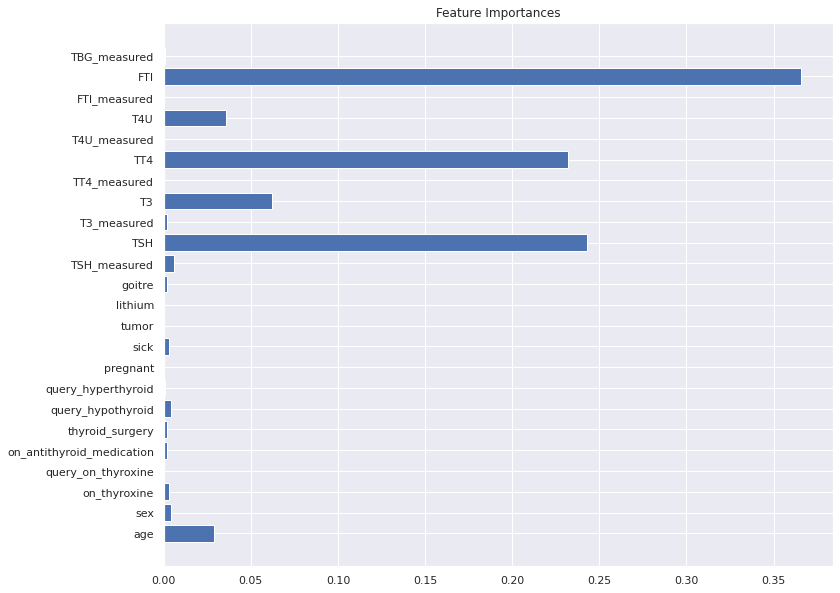

In [43]:
# Rank feature importance
importances = [round(x, 3) for x in random_classifier.feature_importances_]
plt.figure(figsize=(12, 10))
plt.barh(X.columns.to_list(), importances)
plt.title('Feature Importances')


In [44]:
random_forest_features = pd.DataFrame({'Features': X.columns.to_list(), 'Importance': importances})
random_forest_features.sort_values('Importance', ascending=False)

,Features,Importance
22,FTI,0.366
14,TSH,0.243
18,TT4,0.232
16,T3,0.062
20,T4U,0.036
0,age,0.029
13,TSH_measured,0.006
1,sex,0.004
6,query_hypothyroid,0.004
2,on_thyroxine,0.003


The most features in classifying patients in accordance to the random forest classifier are
- FTI
- TSH
- TT4
- T3
- T4U
- age


/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:578: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()


Text(0.5, 1.0, 'Feature Importances based Adaboost')

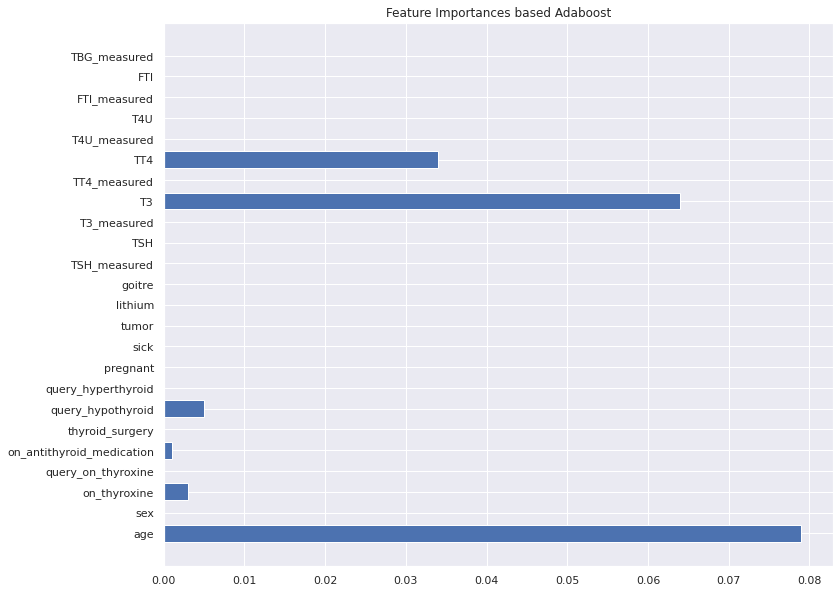

In [45]:
# Rank feature importance
importances_ada = [round(x, 3) for x in adaboost_classifier.feature_importances_]
plt.figure(figsize=(12, 10))
plt.barh(X.columns.to_list(), importances_ada)
plt.title('Feature Importances based Adaboost')


In [46]:
adaboost_features = pd.DataFrame({'Features': X.columns.to_list(), 'Importance': importances_ada})
adaboost_features.sort_values('Importance', ascending=False)

,Features,Importance
0,age,0.079
16,T3,0.064
18,TT4,0.034
6,query_hypothyroid,0.005
2,on_thyroxine,0.003
4,on_antithyroid_medication,0.001
13,TSH_measured,0.000
21,FTI_measured,0.000
19,T4U_measured,0.000
17,TT4_measured,0.000


The most important features based on the adaboost classifier are:
- T3
- TT4
- T4U
- age
- query_hypothyroid
- on_thyroxine


#### Support Vector Machines

According to the tuned random forest and adaboost models, the best feature in classifying patients are: FTI, T3, TSH, TT4, T4U, age, sick and on_thyroxine. To train our svm model, fit it with these features as well as features selected via PCA.

In [47]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [48]:
# Define features and target variable
tree_features = thyroid_data[['FTI', 'T3', 'TSH', 'TT4', 'T4U', 'age', 'sick', 'on_thyroxine']]
thyroid_pca = thyroid_data.drop('status', axis=1)
Y = thyroid_data['status']

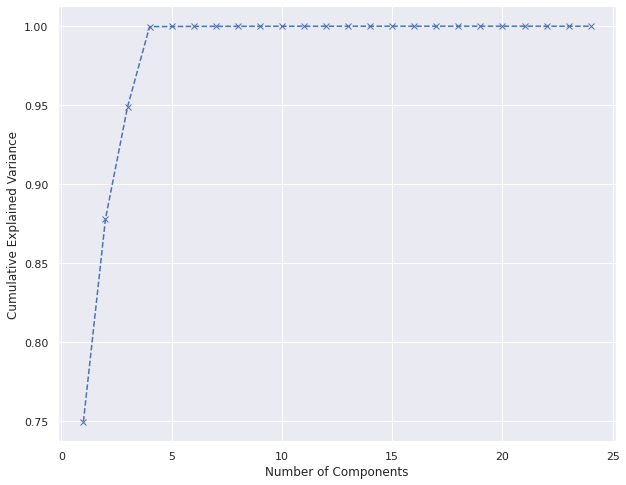

In [49]:
# Apply pca
pca = PCA().fit(thyroid_pca)

# getting the explained variance ratio
evr = pca.explained_variance_ratio_
range_length = len(evr) + 1

# plotting the explained variance ratio so we can determine how any principal components to keep
plt.figure(figsize = (10, 8))
plt.plot(__builtin__.range(1, range_length), evr.cumsum(), marker = 'x', linestyle = '--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

Approximately 4 features explain 95% of variance in our data.

In [50]:
# Reduce our feature set to components
pca_x = PCA(n_components=4).fit_transform(thyroid_pca)

In [51]:
# Split our data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(pca_x, Y, test_size=.3, stratify=Y)
x_train_tree, x_test_tree, y_train_tree, y_test_tree = train_test_split(tree_features, Y, test_size=.3, stratify=Y)

In [52]:
# Standard features
scaler_tree = StandardScaler().fit(x_train_tree)
x_train_tree = scaler_tree.transform(x_train_tree)
x_test_tree = scaler_tree.transform(x_test_tree)

scaler_pca = StandardScaler().fit(x_train)
x_train = scaler_pca.transform(x_train)
x_test = scaler_pca.transform(x_test)

##### Fitting Model: Sigmoid Function

In [53]:
# Build model with a sigmoid kernel 
svc_pca = SVC(kernel='sigmoid', probability=True).fit(x_train, y_train)
svc_tree = SVC(kernel = 'sigmoid', probability=True).fit(x_train_tree, y_train_tree)

In [54]:
# Get the roc_auc scoresl
# Get probabilities for positive outcomes
y_prob_pca = svc_pca.predict_proba(x_test)[:, 1]
y_prob_tree = svc_tree.predict_proba(x_test_tree)[:, 1]


# Get auc score
print(f'ROC AUC Score with PCA reduced data: {roc_auc_score(y_test, y_prob_pca)}')
print(f'ROC AUC Score with tree features: {roc_auc_score(y_test_tree, y_prob_tree)}')

ROC AUC Score with PCA reduced data: 0.9447640117994099
ROC AUC Score with tree features: 0.9638888888888888


Features selected by decison trees have better performance than the pca reduced data. However the support vector model perform extremely well and is almost at par with the tree models.

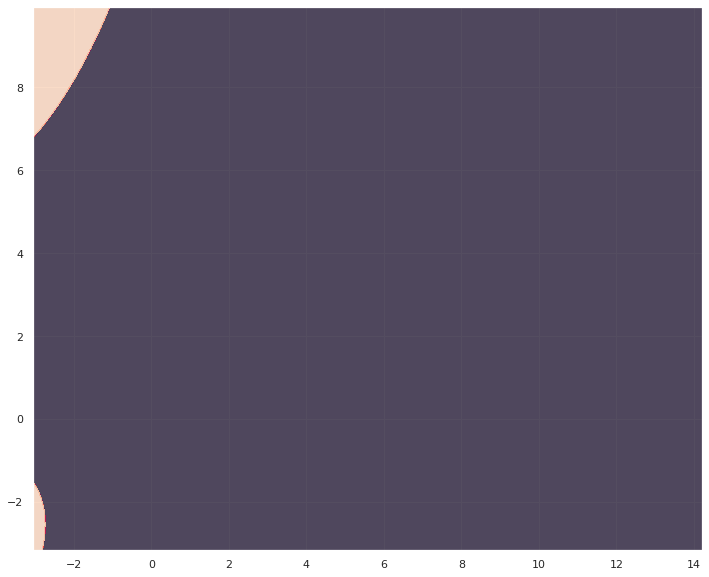

In [55]:
plt.figure(figsize=(12, 10))

X1, X2 = np.meshgrid(np.arange(start = x_test_tree[:, 0].min() - 1, stop = x_test_tree[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_test_tree[:, 1].min() - 1, stop = x_test_tree[:, 1].max() + 1, step = 0.01))
Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in __builtin__.range(6)]).T
pred = svc_tree.predict(Xpred).reshape(X1.shape)   # is a matrix of 0's and 1's !
plt.contourf(X1, X2, pred,
             alpha = 0.75)

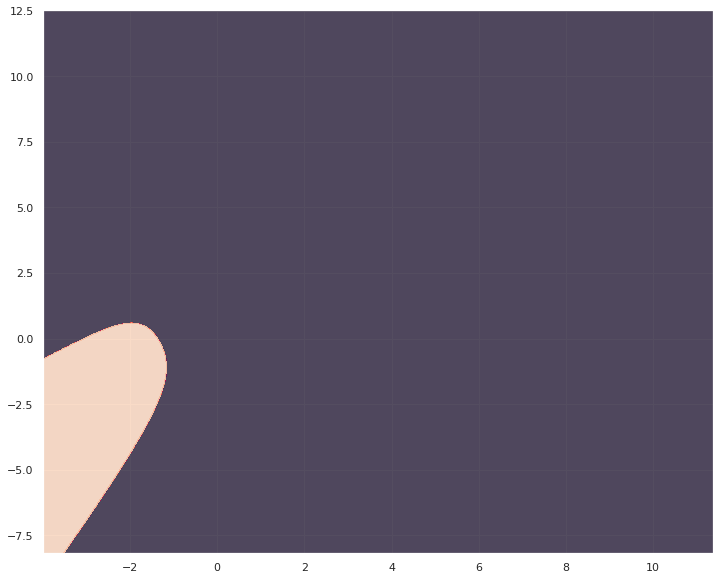

In [56]:
plt.figure(figsize=(12, 10))

X1, X2 = np.meshgrid(np.arange(start = x_test[:, 0].min() - 1, stop = x_test[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_test[:, 1].min() - 1, stop = x_test[:, 1].max() + 1, step = 0.01))
Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in __builtin__.range(2)]).T
pred = svc_pca.predict(Xpred).reshape(X1.shape)   # is a matrix of 0's and 1's !
plt.contourf(X1, X2, pred,
             alpha = 0.75)

The sigmoid kernel, distictly separates the tree feature data and performs moderately well on the pca data.

##### Fitting Model: Polynomial Function

In [57]:
# Build model with a polynomial kernel 
svc_pca = SVC(kernel='poly',degree=3,gamma='auto', probability=True).fit(x_train, y_train)
svc_tree = SVC(kernel='poly',degree=3,gamma='auto', probability=True).fit(x_train_tree, y_train_tree)

In [58]:
# Get the roc_auc scoresl
# Get probabilities for positive outcomes
y_prob_pca = svc_pca.predict_proba(x_test)[:, 1]
y_prob_tree = svc_tree.predict_proba(x_test_tree)[:, 1]


# Get auc score
print(f'ROC AUC Score with PCA reduced data: {roc_auc_score(y_test, y_prob_pca)}')
print(f'ROC AUC Score with tree features: {roc_auc_score(y_test_tree, y_prob_tree)}')

ROC AUC Score with PCA reduced data: 0.9923058013765977
ROC AUC Score with tree features: 0.912733529990167


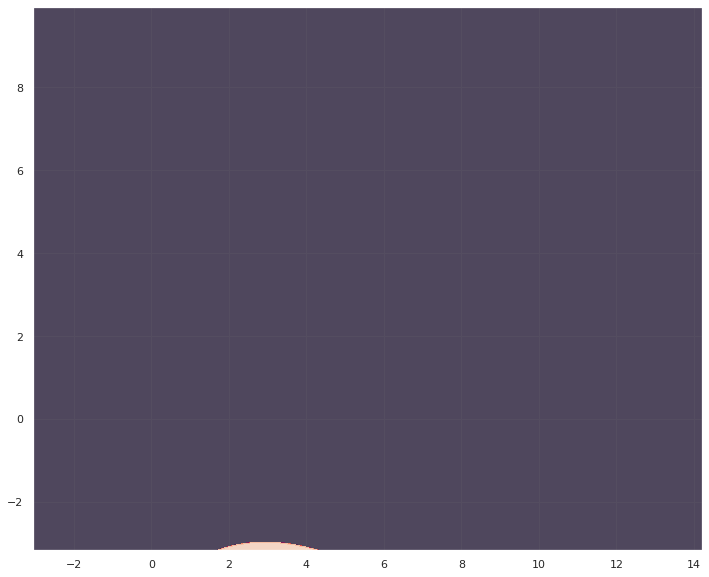

In [59]:
plt.figure(figsize=(12, 10))

X1, X2 = np.meshgrid(np.arange(start = x_test_tree[:, 0].min() - 1, stop = x_test_tree[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_test_tree[:, 1].min() - 1, stop = x_test_tree[:, 1].max() + 1, step = 0.01))
Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in __builtin__.range(6)]).T
pred = svc_tree.predict(Xpred).reshape(X1.shape)   # is a matrix of 0's and 1's !
plt.contourf(X1, X2, pred,
             alpha = 0.75)

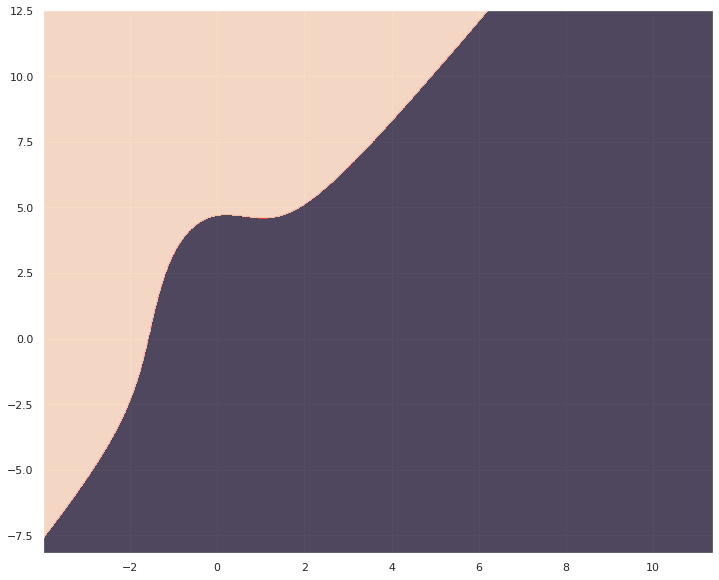

In [60]:
plt.figure(figsize=(12, 10))

X1, X2 = np.meshgrid(np.arange(start = x_test[:, 0].min() - 1, stop = x_test[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_test[:, 1].min() - 1, stop = x_test[:, 1].max() + 1, step = 0.01))
Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in __builtin__.range(2)]).T
pred = svc_pca.predict(Xpred).reshape(X1.shape)   # is a matrix of 0's and 1's !
plt.contourf(X1, X2, pred,
             alpha = 0.75)

##### Fitting Model: RBF Function

In [61]:
# Build model with an rbf kernel 
svc_pca = SVC(kernel='rbf', probability=True).fit(x_train, y_train)
svc_tree = SVC(kernel = 'rbf', probability=True).fit(x_train_tree, y_train_tree)

In [62]:
# Get the roc_auc scoresl
# Get probabilities for positive outcomes
y_prob_pca = svc_pca.predict_proba(x_test)[:, 1]
y_prob_tree = svc_tree.predict_proba(x_test_tree)[:, 1]


# Get auc score
print(f'ROC AUC Score with PCA reduced data: {roc_auc_score(y_test, y_prob_pca)}')
print(f'ROC AUC Score with tree features: {roc_auc_score(y_test_tree, y_prob_tree)}')

ROC AUC Score with PCA reduced data: 0.9880039331366764
ROC AUC Score with tree features: 0.9866764995083579


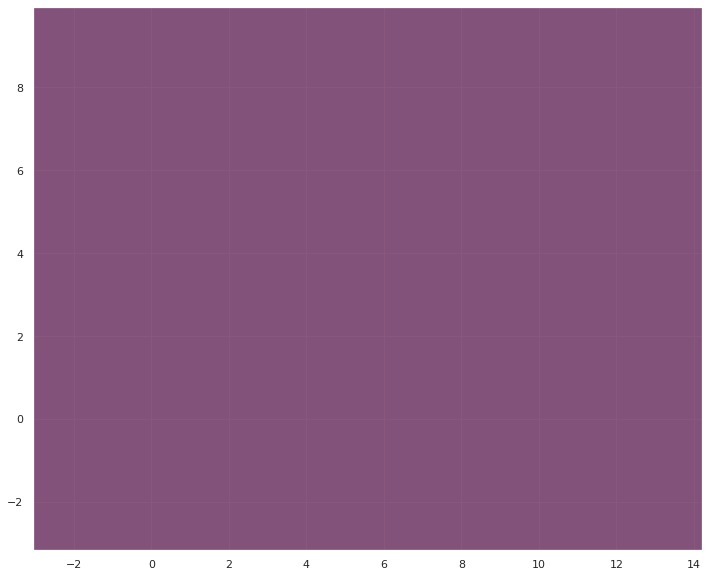

In [65]:
plt.figure(figsize=(12, 10))

X1, X2 = np.meshgrid(np.arange(start = x_test_tree[:, 0].min() - 1, stop = x_test_tree[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_test_tree[:, 1].min() - 1, stop = x_test_tree[:, 1].max() + 1, step = 0.01))
Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in __builtin__.range(6)]).T
pred = svc_tree.predict(Xpred).reshape(X1.shape)   # is a matrix of 0's and 1's !
plt.contourf(X1, X2, pred,
             alpha = 0.75)

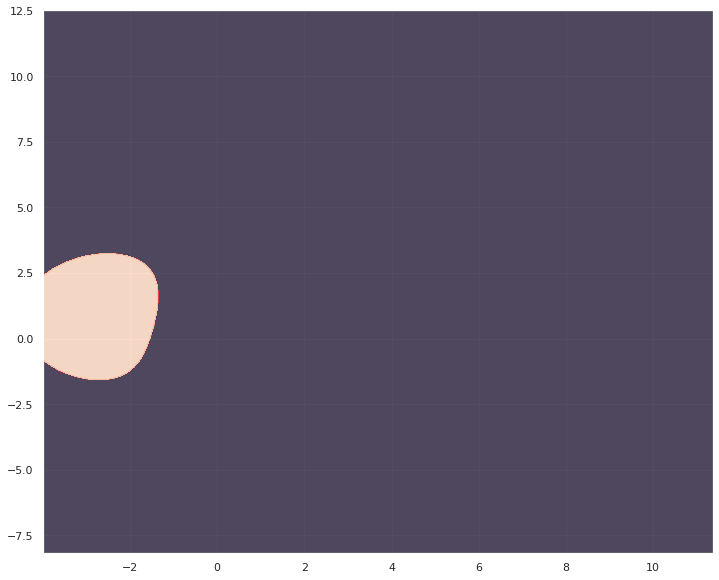

In [64]:
plt.figure(figsize=(12, 10))

X1, X2 = np.meshgrid(np.arange(start = x_test[:, 0].min() - 1, stop = x_test[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_test[:, 1].min() - 1, stop = x_test[:, 1].max() + 1, step = 0.01))
Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in __builtin__.range(2)]).T
pred = svc_pca.predict(Xpred).reshape(X1.shape)   # is a matrix of 0's and 1's !
plt.contourf(X1, X2, pred,
             alpha = 0.75)

The best performing kernel is the polynomial function kernel on the PCA reduced data. A close second being the rbf kernel on both the PCA reduced data and the tree selected features.

### Conclusion

After comparison between PCA reduced data and features selected using the Random Forest and Adaboost models, the PCA reduced data has better performance in the polynomial and rbf kernels. Random forest and adaboost models have relatively the same roc_auc score after hyperparameter tuning. ROC_AUC is a more appropriate metric for our data due to the high imbalance between classes in our target variable. To handle this stratified sampling is also applied during the train test split.

### Challenging the solution.

#### a) Did we have the right question?
Yes.

#### b) Did we have the right data?
Yes. The data available was suitable for analysis.

#### c) What can be done to improve the solution?
Tuning of the support vector machine with the polynomial kernel.